In [8]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler


In [11]:
# Reading data and convering embeddings from str to np.array

file_junk = "./prot_voc.tsv"
junk_voc = pd.read_csv(file_junk, sep='\t')
emb_junk_str = junk_voc["Embs"]
emb_junk = []
for string in emb_junk_str:
    array = np.fromstring(string[1:-1], dtype=float, sep=' ')
    emb_junk.append(array)
junk_voc["Embs"] = emb_junk
print(type(junk_voc["Embs"][0]))


file_cas = "./cas_voc.tsv"
cas_voc = pd.read_csv(file_cas, sep='\t')
print(type(cas_voc["Embs"][0]))
print(cas_voc["Embs"][0])
emb_cas_str = cas_voc["Embs"]
emb_cas = []
for string in emb_cas_str:
    array = np.fromstring(string, dtype=float, sep=',')
    emb_cas.append(array)
cas_voc["Embs"] = emb_cas
print(type(cas_voc["Embs"][0]))

<class 'numpy.ndarray'>
<class 'str'>
5.101668462157249451e-02,4.367627203464508057e-02,-7.221496850252151489e-02,-8.814517408609390259e-02,-6.854719482362270355e-03,6.629934161901473999e-02,-3.416076302528381348e-02,-1.610739901661872864e-02,4.690989851951599121e-02,-4.934545606374740601e-02,-3.210128098726272583e-02,-6.251789629459381104e-02,2.770964615046977997e-02,-1.897793821990489960e-02,6.662412732839584351e-02,-6.228410825133323669e-02,-4.131682217121124268e-02,-3.204470127820968628e-02,1.073934789746999741e-02,-2.846843376755714417e-02,5.765523388981819153e-02,1.490361057221889496e-02,-2.152313292026519775e-02,4.432028159499168396e-02,-3.966574743390083313e-02,9.987859427928924561e-02,-7.804663479328155518e-02,-4.913975298404693604e-02,-2.333217114210128784e-02,-4.177901521325111389e-02,3.599918633699417114e-02,-1.686915196478366852e-02,-2.209886163473129272e-02,-3.610901476349681616e-04,-8.575464598834514618e-03,-9.040310047566890717e-03,-4.306371137499809265e-02,2.1566295996

1000


In [66]:
# Making my own tokenizer because apparently TPOT forgot how to read string classes

embs = cas_voc["Embs"]
embs = embs.append(junk_voc["Embs"], ignore_index=True)
lables = cas_voc["Gene_family"]
lables = lables.append(junk_voc["Gene_family"], ignore_index=True)

path_classes = "./genes_to_use.tsv"
with open(path_classes) as file:
    lines = []
    for i, line in enumerate(file):
        if i!=0:
            line = line.rstrip('\n')
            parts = line.split('\t')
            lines.append(parts[0])
token = lines.index

tags = []
for label in lables:
    tags.append(token(label))
embs = list(embs)
print(tags[-3: -1])
print(lables[-3: -1])
print(embs[0].shape)

[37, 37]
37967    Junk
37968    Junk
Name: Gene_family, dtype: object
(768,)


C:\Users\Dart_ilder\AppData\Local\Temp\ipykernel_19144\2348235172.py:4: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  embs = embs.append(junk_voc["Embs"], ignore_index=True)
C:\Users\Dart_ilder\AppData\Local\Temp\ipykernel_19144\2348235172.py:6: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  lables = lables.append(junk_voc["Gene_family"], ignore_index=True)


In [67]:
X_train, X_test, y_train, y_test = train_test_split(embs, tags,
                                                    train_size=0.75, test_size=0.25, random_state=42, shuffle=True, stratify=tags)

In [68]:
# Loading classifier

# Average CV score on the training set was: 0.9474667732147433
# RobustScaler + LogisticRegression(C=1.0, dual=False, penalty="l2", max_iter=100) = acc 0.9800930433841826
classifier = make_pipeline(
    RobustScaler(),
    LogisticRegression(C=1.0, dual=False, penalty="l2", max_iter=100)
)
classifier.fit(X_train, y_train)
classifier.score(X_test, y_test)

c:\Users\Dart_ilder\miniconda3\envs\.conda_Cas\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9795638891815022

In [80]:
print(np.array(lines))

['cas1' 'cas2' 'cas5' 'cas7' 'cas3' 'cas6e' 'cas8e' 'cse2gr11' 'cas4'
 'cas6' 'cas9' 'cas10' 'csm3gr7' 'cas8c' 'csn2' 'cas6f' 'cas7f' 'cas8f'
 'cas5f' 'cas3f' 'cas7b' 'csx1' 'csm2gr11' 'csm4gr5' 'csm5gr7' 'cas8b1'
 'cmr3gr5' 'csm6' 'cmr5gr11' 'cmr4gr7' 'cas8b2' 'cmr6gr7' 'cmr1gr7'
 'csb2gr5' 'csb1gr7' 'csx19' 'csx10gr5' 'Junk']


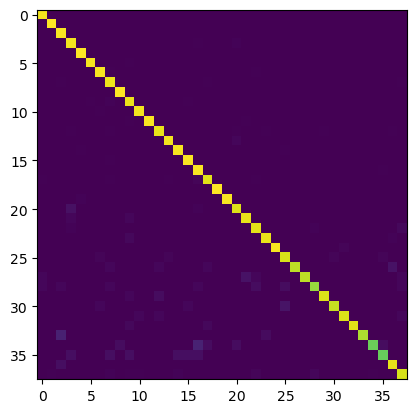

In [79]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
y_true = y_test
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_true, y_pred, normalize= "true")
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=np.array(lines))
plt.imshow(cm)

In [93]:
# Checking accuracy of the least represented class

mask = (tags == 37)
tags = np.array(tags)
a = tags[mask]
print(mask)
A = np.array(embs)[mask]
classifier.score(A, a)

[False False False ...  True  True  True]


0.987

In [91]:
# Loading classifier

# Average CV score on the training set was: 0.9474667732147433
# RobustScaler + LogisticRegression(C=1.0, dual=False, penalty="l2", max_iter=100) = acc 0.9800930433841826
classifier = make_pipeline(
    RobustScaler(),
    LogisticRegression(C=1.0, dual=False, penalty="l2", max_iter=100, multi_class="ovr")
)
classifier.fit(X_train, y_train)
classifier.score(X_test, y_test)

c:\Users\Dart_ilder\miniconda3\envs\.conda_Cas\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9803012746234068

In [122]:
# JunkVsAll
embs = cas_voc["Embs"]
embs = embs.append(junk_voc["Embs"], ignore_index=True)
lables = cas_voc["Gene_family"]
lables = lables.append(junk_voc["Gene_family"], ignore_index=True)
mask = ( lables != "Junk")
lables[mask] = 0
mask = ( lables == "Junk")
lables[mask] = 1
lables

C:\Users\Dart_ilder\AppData\Local\Temp\ipykernel_19144\2989773909.py:3: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  embs = embs.append(junk_voc["Embs"], ignore_index=True)
C:\Users\Dart_ilder\AppData\Local\Temp\ipykernel_19144\2989773909.py:5: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  lables = lables.append(junk_voc["Gene_family"], ignore_index=True)


0        0
1        0
2        0
3        0
4        0
        ..
37965    1
37966    1
37967    1
37968    1
37969    1
Name: Gene_family, Length: 37970, dtype: object

In [123]:
X_train, X_test, y_train, y_test = train_test_split(list(embs), list(lables),
                                                    train_size=0.75, test_size=0.25, random_state=42, shuffle=True, stratify=lables)

In [115]:
# Loading classifier

# Average CV score on the training set was: 0.9474667732147433
# RobustScaler + LogisticRegression(C=1.0, dual=False, penalty="l2", max_iter=100) = acc 0.9800930433841826
classifier = make_pipeline(
    RobustScaler(),
    LogisticRegression(C=1.0, dual=False, penalty="l2", max_iter=100, multi_class="ovr")
)
classifier.fit(X_train, y_train)
classifier.score(X_test, y_test)

c:\Users\Dart_ilder\miniconda3\envs\.conda_Cas\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9968397766775519

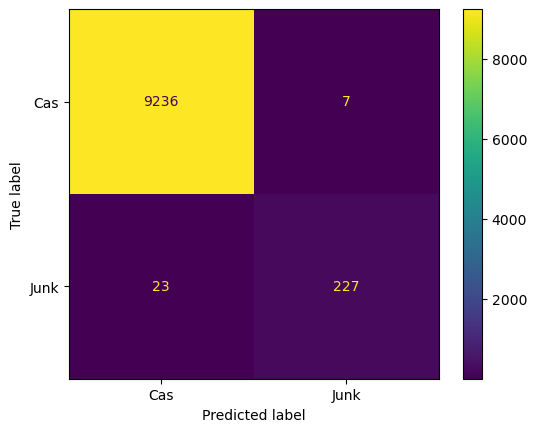

In [125]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
y_true = y_test
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_true, y_pred, normalize= "true")
ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, display_labels=["Cas", "Junk"])
plt.show()